In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 


from scipy import stats
from scipy.stats import norm, skew 


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output

# Read datasets and Check them

In [2]:
#Load datasets
#pd.set_option('display.max_columns', 500)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#Check sizes
print ('\nTrain shape: ',train.shape)
print ('\nTest shape: ',test.shape)


Train shape:  (1460, 81)

Test shape:  (1459, 80)


In [4]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Save ID
train_id = train['Id']
test_id = test['Id']

#Drop Id column
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# EDA

Lets build correlation matrix for variables including SalePrice

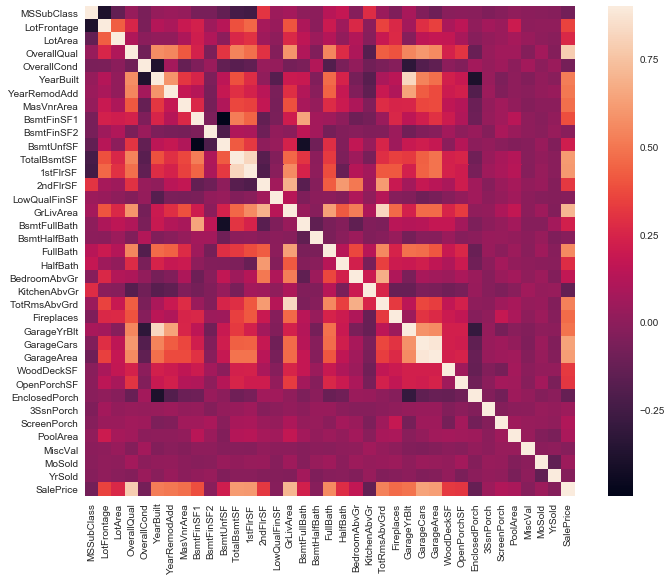

In [6]:
sns.set()
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

Lets now explore relationship between SalePrices and top correlated variables

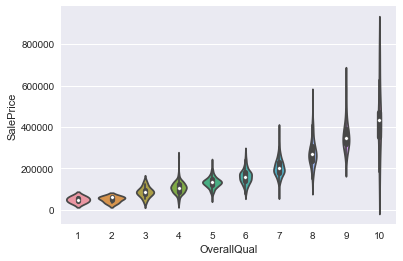

In [7]:
sns.violinplot(x="OverallQual", y="SalePrice", data=train, split=True);

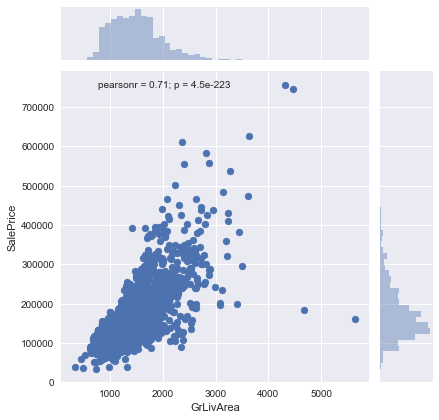

In [8]:
sns.jointplot(x="GrLivArea", y="SalePrice", data=train);

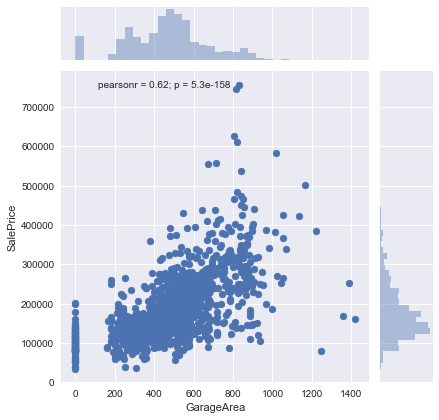

In [9]:
sns.jointplot(x="GarageArea", y="SalePrice", data=train);

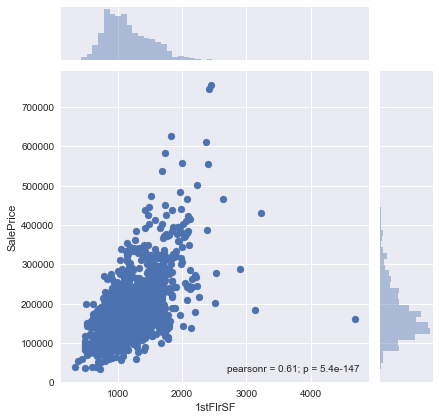

In [10]:
sns.jointplot(x="1stFlrSF", y="SalePrice", data=train);

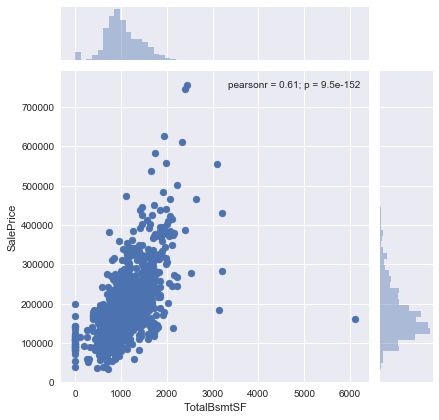

In [11]:
sns.jointplot(x="TotalBsmtSF", y="SalePrice", data=train);

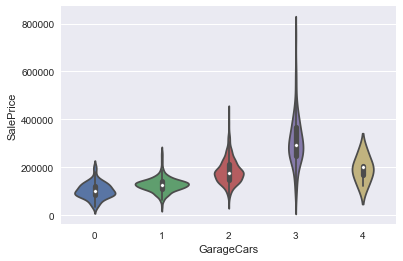

In [12]:
sns.violinplot(x="GarageCars", y="SalePrice", data=train, split=True);

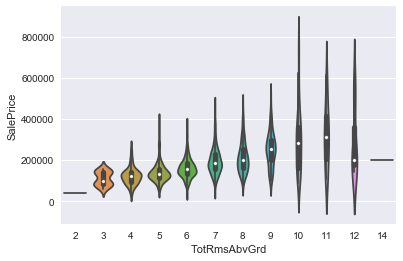

In [13]:
sns.violinplot(x="TotRmsAbvGrd", y="SalePrice", data=train, split=True);

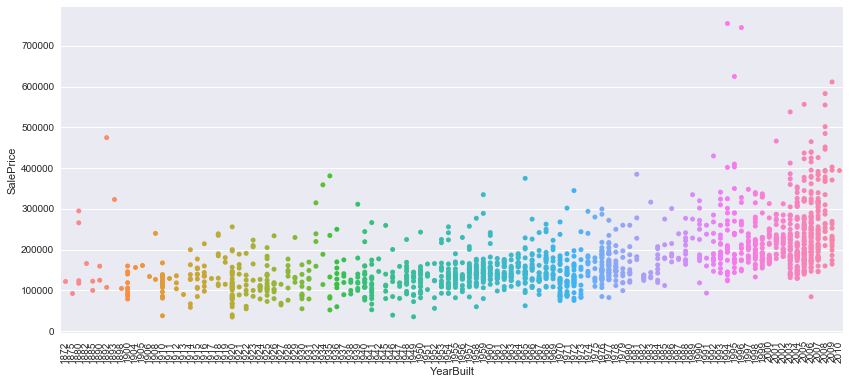

In [14]:
plt.subplots(figsize=(14, 6))
p = sns.stripplot(x="YearBuilt", y="SalePrice", data=train);
p.set_xticklabels(p.get_xticklabels(),rotation=90);

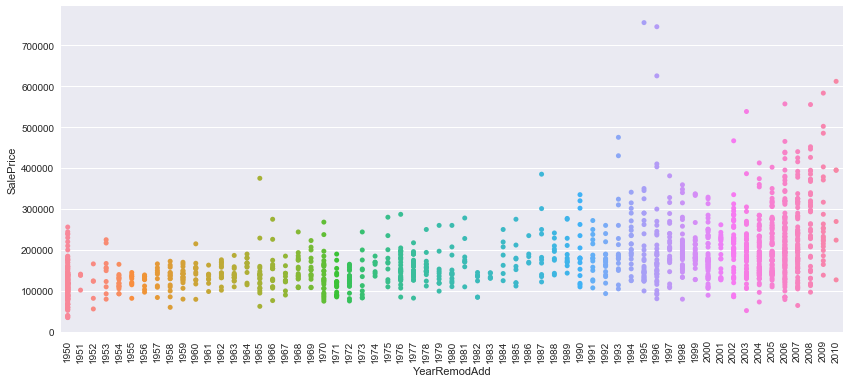

In [15]:
plt.subplots(figsize=(14, 6))
p = sns.stripplot(x="YearRemodAdd", y="SalePrice", data=train);
p.set_xticklabels(p.get_xticklabels(),rotation=90);

### Deleting Outliers

In [16]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index)

In [17]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])


 mu = 12.02 and sigma = 0.40



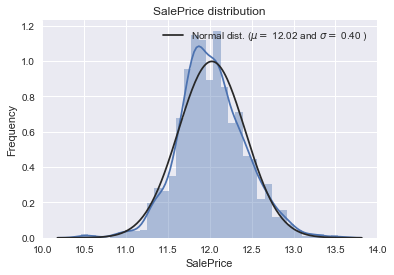

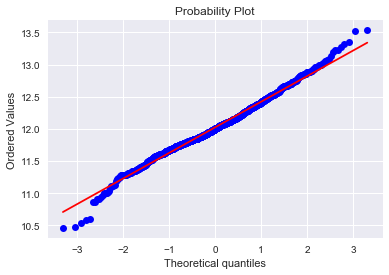

In [18]:
#Check the new distribution 
sns.distplot(train["SalePrice"] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train["SalePrice"] )
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train["SalePrice"], plot=plt)
plt.show()

# Compare Train and Test Sets

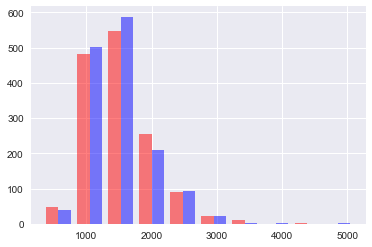

In [19]:
plt.hist([train.GrLivArea, test.GrLivArea], color=['r','b'], alpha=0.5);

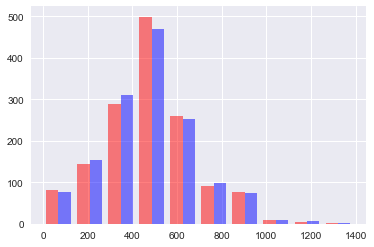

In [20]:
plt.hist([train.GarageArea, test.GarageArea], color=['r','b'], alpha=0.5);

# Data Imputation

In [21]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2916, 79)


In [22]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.399
Alley,93.210
Fence,80.418
FireplaceQu,48.697
LotFrontage,16.632
GarageQual,5.453
GarageCond,5.453
GarageFinish,5.453
GarageYrBlt,5.453


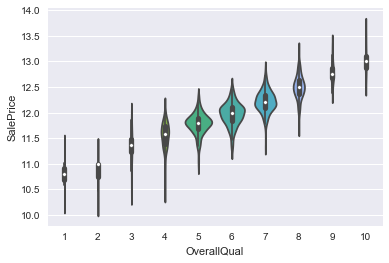

In [23]:
sns.violinplot(x="OverallQual", y="SalePrice", data=train, split=True, scale='count');

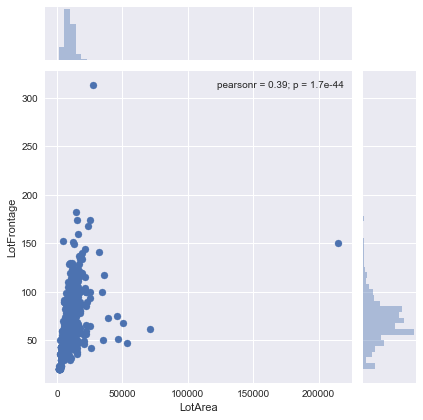

In [24]:
sns.jointplot(x="LotArea", y="LotFrontage", data=train);

In [25]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [26]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


# Feature Engineering

In [27]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
#all_data['OverallQual'] = all_data['OverallQual'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)

In [28]:
'''
for col in ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'EnclosedPorch',
        'GrLivArea', 'LotArea', 'LowQualFinSF', 'MiscVal', 'OpenPorchSF', 'PoolArea',
        'ScreenPorch',  'WoodDeckSF']:
    all_data[col] = all_data[col].astype('float64')
    '''

"\nfor col in ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'EnclosedPorch',\n        'GrLivArea', 'LotArea', 'LowQualFinSF', 'MiscVal', 'OpenPorchSF', 'PoolArea',\n        'ScreenPorch',  'WoodDeckSF']:\n    all_data[col] = all_data[col].astype('float64')\n    "

In [29]:
'''
#Encoding categorical variables to preserver order
all_data.Street = all_data.Street.astype('category', ordered=True, categories=['Grvl', 'Pave']).cat.codes
all_data.BsmtCond = all_data.BsmtCond.astype('category', ordered=True, categories=['Po', 'Fa','None','TA','Gd','Ex']).cat.codes
all_data.ExterCond = all_data.ExterCond.astype('category', ordered=True, categories=['Po', 'Fa','Gd','TA','Ex']).cat.codes
all_data.ExterQual = all_data.ExterQual.astype('category', ordered=True, categories=['Po','Fa', 'TA','Gd','Ex']).cat.codes
all_data.FireplaceQu = all_data.FireplaceQu.astype('category', ordered=True, categories=['Po','None','Fa', 'TA','Gd','Ex']).cat.codes
all_data.BsmtQual = all_data.BsmtQual.astype('category', ordered=True, categories=['Po','Fa','None', 'TA','Gd','Ex']).cat.codes
all_data.GarageQual = all_data.GarageQual.astype('category', ordered=True, categories=['None','Po','Fa', 'TA','Gd','Ex']).cat.codes
all_data.GarageCond = all_data.GarageCond.astype('category', ordered=True, categories=['None','Po','Fa', 'TA','Gd','Ex']).cat.codes
all_data.HeatingQC = all_data.HeatingQC.astype('category', ordered=True, categories=['Po','Fa', 'TA','Gd','Ex']).cat.codes
all_data = all_data.drop(columns=['PoolQC'])
all_data.KitchenQual = all_data.KitchenQual.astype('category', ordered=True, categories=['Po','Fa', 'TA','Gd','Ex']).cat.codes
all_data.GarageFinish = all_data.GarageFinish.astype('category', ordered=True, categories=['None','Unf', 'RFn','Fin']).cat.codes
all_data.PavedDrive = all_data.PavedDrive.astype('category', ordered=True, categories=['N','P', 'Y']).cat.codes
all_data.OverallCond = all_data.OverallCond.astype('category', ordered=True, categories=['1','2', '3','4','5','6','7','8','9','10']).cat.codes
all_data.CentralAir = all_data.CentralAir.astype('category', ordered=True, categories=['N','Y']).cat.codes
all_data.OverallQual = all_data.OverallQual.astype('category', ordered=True, categories=['1','2', '3','4','5','6','7','8','9','10']).cat.codes
'''

"\n#Encoding categorical variables to preserver order\nall_data.Street = all_data.Street.astype('category', ordered=True, categories=['Grvl', 'Pave']).cat.codes\nall_data.BsmtCond = all_data.BsmtCond.astype('category', ordered=True, categories=['Po', 'Fa','None','TA','Gd','Ex']).cat.codes\nall_data.ExterCond = all_data.ExterCond.astype('category', ordered=True, categories=['Po', 'Fa','Gd','TA','Ex']).cat.codes\nall_data.ExterQual = all_data.ExterQual.astype('category', ordered=True, categories=['Po','Fa', 'TA','Gd','Ex']).cat.codes\nall_data.FireplaceQu = all_data.FireplaceQu.astype('category', ordered=True, categories=['Po','None','Fa', 'TA','Gd','Ex']).cat.codes\nall_data.BsmtQual = all_data.BsmtQual.astype('category', ordered=True, categories=['Po','Fa','None', 'TA','Gd','Ex']).cat.codes\nall_data.GarageQual = all_data.GarageQual.astype('category', ordered=True, categories=['None','Po','Fa', 'TA','Gd','Ex']).cat.codes\nall_data.GarageCond = all_data.GarageCond.astype('category', ord

In [30]:
'''
from sklearn.preprocessing import LabelEncoder
cols = ('BsmtFinType1', 
        'BsmtFinType2', 'Fence', 'BsmtExposure', 'LandSlope',
        'LotShape',  'Alley',  'MSSubClass',  
        'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))
'''

"\nfrom sklearn.preprocessing import LabelEncoder\ncols = ('BsmtFinType1', \n        'BsmtFinType2', 'Fence', 'BsmtExposure', 'LandSlope',\n        'LotShape',  'Alley',  'MSSubClass',  \n        'MoSold')\n# process columns, apply LabelEncoder to categorical features\nfor c in cols:\n    lbl = LabelEncoder() \n    lbl.fit(list(all_data[c].values)) \n    all_data[c] = lbl.transform(list(all_data[c].values))\n\n# shape        \nprint('Shape all_data: {}'.format(all_data.shape))\n"

In [31]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))



Shape all_data: (2916, 78)


In [32]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [33]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.936
PoolArea,17.686
LotArea,13.263
LowQualFinSF,12.082
3SsnPorch,11.370
LandSlope,4.995
KitchenAbvGr,4.300
BsmtFinSF2,4.144
EnclosedPorch,4.002
ScreenPorch,3.944


In [34]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [35]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2916, 220)


In [36]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# Feature Selection

Feature ranking:
1. feature 58 (0.178843) | (0.178843)
2. feature 46 (0.176915) | (0.355758)
3. feature 30 (0.073023) | (0.428781)
4. feature 18 (0.066034) | (0.494815)
5. feature 22 (0.058250) | (0.553065)
6. feature 25 (0.056546) | (0.609611)
7. feature 55 (0.033347) | (0.642958)
8. feature 119 (0.032837) | (0.675795)
9. feature 15 (0.030876) | (0.706671)
10. feature 13 (0.028909) | (0.735580)
11. feature 34 (0.026831) | (0.762411)
12. feature 21 (0.023139) | (0.785551)
13. feature 124 (0.009589) | (0.795140)
14. feature 0 (0.008758) | (0.803897)
15. feature 24 (0.007630) | (0.811527)
16. feature 153 (0.007065) | (0.818593)
17. feature 45 (0.006968) | (0.825561)
18. feature 56 (0.006909) | (0.832470)
19. feature 7 (0.006875) | (0.839345)
20. feature 157 (0.006316) | (0.845660)
21. feature 53 (0.005922) | (0.851582)
22. feature 4 (0.005167) | (0.856750)
23. feature 156 (0.004873) | (0.861622)
24. feature 128 (0.004823) | (0.866445)
25. feature 36 (0.004470) | (0.870915)
26. feature 11

209. feature 135 (0.000006) | (0.999980)
210. feature 204 (0.000006) | (0.999986)
211. feature 76 (0.000005) | (0.999991)
212. feature 166 (0.000003) | (0.999994)
213. feature 77 (0.000002) | (0.999996)
214. feature 168 (0.000002) | (0.999998)
215. feature 130 (0.000001) | (0.999999)
216. feature 105 (0.000001) | (0.999999)
217. feature 195 (0.000000) | (1.000000)
218. feature 93 (0.000000) | (1.000000)
219. feature 78 (0.000000) | (1.000000)
220. feature 79 (0.000000) | (1.000000)


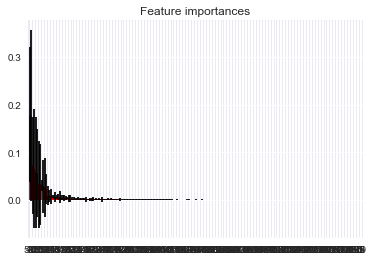

In [37]:
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
# Build a forest and compute the feature importances
forest = ExtraTreesRegressor(n_estimators=250,
                              random_state=0)

forest.fit(train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train.shape[1]):
    print("%d. feature %d (%f) | (%f)" % (f + 1, indices[f], importances[indices[f]],np.cumsum(importances[indices])[f]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train.shape[1]), indices)
plt.xlim([-1, train.shape[1]])
plt.show()

In [38]:
train.columns[indices]

Index(['TotalSF', 'OverallQual', 'GrLivArea', 'ExterQual', 'FullBath',
       'GarageCars', 'YearBuilt', 'Foundation_PConc', 'CentralAir', 'BsmtQual',
       ...
       'Condition2_PosA', 'MiscFeature_TenC', 'Condition2_PosN',
       'Neighborhood_Blueste', 'Heating_Floor', 'Exterior2nd_CBlock',
       'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Condition2_RRAe',
       'Condition2_RRAn'],
      dtype='object', length=220)

# PCA

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(train)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
print(pca.explained_variance_ratio_) 

[ 0.21399338  0.16694993  0.11793963  0.07908851  0.07527616  0.06009489
  0.04598313  0.04420497  0.03193566  0.02764517  0.02333389  0.0214396
  0.00861483  0.00774237  0.00641583  0.00565193  0.00455033  0.00304468
  0.00296073  0.00275832  0.00257439  0.0022922   0.00223682  0.00208542
  0.00180813  0.00171595  0.00165767  0.00158872  0.00151618  0.00144688
  0.00134599  0.00128179  0.00121883  0.00109966  0.00102879  0.00096111
  0.00089698  0.00087109  0.00082789  0.00079558  0.00076344  0.00072595
  0.00068144  0.00066383  0.00064654  0.00061407  0.0006008   0.00056833
  0.00054183  0.00050759]


# Models Creation

In [41]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [42]:
from sklearn.model_selection import GridSearchCV
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Extra Trees Forest

In [43]:
xforest = ExtraTreesRegressor(n_estimators=250,
                              random_state=0)

In [44]:
score = rmsle_cv(xforest)
print("\nExtraTreesRegressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ExtraTreesRegressor score: 0.1270 (0.0088)



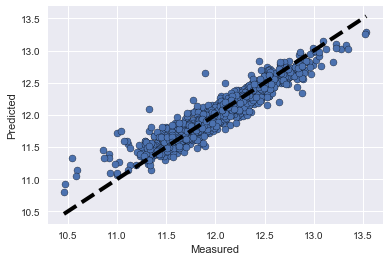

In [45]:
from sklearn.model_selection import cross_val_predict
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
predicted = cross_val_predict(xforest, train, y, cv=5)


fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Lasso

In [50]:
parameters = {'alpha':[0.0001,0.001, 0.0015,0.02,0.0005]}
lasso_p = Lasso()
clf = GridSearchCV(lasso_p, parameters)
clf.fit(train.values, y_train)
clf.best_params_

{'alpha': 0.0005}

In [47]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [48]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1114 (0.0072)



In [ ]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
predicted = cross_val_predict(lasso, train, y_train, cv=5)


fig, ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### ENet

In [ ]:
parameters = {'alpha':[0.0001,0.001, 0.0015,0.002,0.0025]}
enet_p = ElasticNet()
clf = GridSearchCV(enet_p, parameters)
clf.fit(train.values, y_train)
clf.best_params_

In [ ]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0002, l1_ratio=.9, random_state=3))

In [ ]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
predicted = cross_val_predict(ENet, train, y, cv=5)


fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

In [ ]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [ ]:
cv_ridge.min()

### KRR

In [ ]:
parameters = {'kernel':('linear', 'poly'), 'alpha':[0.01,0.015, 0.3,0.6,0.001,1.],'degree':[2,3,4,5],'coef0':[0.1,1,2,2.5]}
KRR_p = KernelRidge()
clf = GridSearchCV(KRR_p, parameters)
clf.fit(new_train.values, y_train)
clf.best_params_

In [ ]:
KRR = make_pipeline(RobustScaler(), KernelRidge(alpha=0.06, kernel='linear', degree=4, coef0=2.0))

In [ ]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
predicted = cross_val_predict(KRR, new_train, y, cv=5)


fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### GBoost

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [ ]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
predicted = cross_val_predict(GBoost, new_train, y, cv=5)


fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### XGBoost

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=11, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                                nthread = -1)

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=1., gamma=0.0468, 
                             learning_rate=0.05, max_depth=10, 
                             min_child_weight=6, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.8, silent=1,
                                nthread = -1)

In [ ]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
predicted = cross_val_predict(model_xgb, new_train, y, cv=5)


fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### LGB

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

In [ ]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
predicted = cross_val_predict(model_lgb, new_train, y, cv=5)


fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Stacking

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [ ]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
#predicted = cross_val_predict(stacked_averaged_models, new_train, y, cv=5)
stacked_averaged_models.fit(new_train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(new_train.values)

fig, ax = plt.subplots()
ax.scatter(y, stacked_train_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(solver='adam', hidden_layer_sizes=100,
                           max_iter=200, shuffle=True, random_state=1,
                           activation='identity')
mlp.fit(new_train.values, y_train)

In [ ]:
score = rmsle_cv(mlp)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [ ]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
#predicted = cross_val_predict(stacked_averaged_models, new_train, y, cv=5)
mlp_train_pred = mlp.predict(new_train.values)

fig, ax = plt.subplots()
ax.scatter(y, mlp_train_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Prediction

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
forest.fit(new_train, y_train)
forest_train_pred = forest.predict(new_train)
forest_pred = np.expm1(forest.predict(new_test))
print(rmsle(y_train, forest_train_pred))

In [ ]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
#predicted = cross_val_predict(xforest, new_train, y, cv=5)


fig, ax = plt.subplots()
ax.scatter(y, forest_train_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
stacked_pred = np.expm1(stacked_averaged_models.predict(new_test.values))
print(rmsle(y_train, stacked_train_pred))

In [ ]:
model_xgb.fit(new_train, y_train)
xgb_train_pred = model_xgb.predict(new_train)
xgb_pred = np.expm1(model_xgb.predict(new_test))
print(rmsle(y_train, xgb_train_pred))

In [ ]:
model_lgb.fit(new_train, y_train)
lgb_train_pred = model_lgb.predict(new_train)
lgb_pred = np.expm1(model_lgb.predict(new_test.values))
print(rmsle(y_train, lgb_train_pred))

In [ ]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 + xgb_train_pred*0.15 +
               lgb_train_pred*0.15 ))

In [ ]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = stacked_pred
sub.to_csv('submission_stacked.csv',index=False)

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = forest_pred
sub.to_csv('submission_forest.csv',index=False)

In [ ]:
ensemble2 = stacked_pred*0.70 + forest_pred*0.1 + xgb_pred*0.1 + lgb_pred*0.1
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = ensemble2
sub.to_csv('submission_ensemble2.csv',index=False)